In [1]:
import pandas as pd
import lstm
import time
import h5py

ModelInformation = pd.read_pickle("../model/ModelInformation.pickle")
columns = ModelInformation.columns
global_start_time = time.time()
for i in range(len(ModelInformation)):
    forloop_start_time = time.time()
    #
    Filename = ModelInformation.loc[i,columns[0]]
    ColumnList = ModelInformation.loc[i,columns[1]]
    WindowSize = ModelInformation.loc[i,columns[2]]
    NumOfPredictDay = ModelInformation.loc[i,columns[3]]
    
    print('Train the ' + str(i) + '.h5 model')
    
    #載入資料
    DataSet = lstm.LoadData(Filename, ColumnList, WindowSize, NumOfPredictDay)
    #正規化資料
    NormalizeData = lstm.NormaliseWindows(DataSet)
    #切割資料
    #x_train, y_train, x_test, y_test = lstm.SplitData(NormalizeData, ColumnList, NumOfPredictDay)
    #sequence_length = WindowSize + NumOfPredictDay

    #切割訓練資料
    x_train, y_train = lstm.SplitDatatoTrain(NormalizeData, ColumnList, NumOfPredictDay)
    #切割預測資料
    x_predict = lstm.SplitDatatoPredict(DataSet, ColumnList, NumOfPredictDay)
    x_predict = lstm.NormaliseWindows(x_predict)
    
    #
    Layer = ModelInformation.loc[i,columns[4]]
    Loss = ModelInformation.loc[i,columns[5]]
    Optimizer = ModelInformation.loc[i,columns[6]]
    
    #建立LSTM模型
    model = lstm.build_model(Layer,Loss,Optimizer)
    
    #
    BatchSize = ModelInformation.loc[i,columns[7]]
    Epoch = ModelInformation.loc[i,columns[8]]
    ValidationSplit = ModelInformation.loc[i,columns[9]]
    
    #訓練LSTM模型
    model.fit(  x_train,
                y_train,
                batch_size=BatchSize,
                nb_epoch=Epoch,
                validation_split=ValidationSplit)
    
    #
    ModelName = ModelInformation.loc[i,columns[10]]
    
    #HDF5, pip3
    model.save('../model/' + ModelName)
    print('Training duration (s) : ',time.time() - forloop_start_time)

print('Total training duration (s) : ',time.time() - global_start_time)

Using TensorFlow backend.


(3278, 50, 7)
(3278, 3)
(1, 50, 7)
> Compilation Time :  0.024061918258666992
Train on 2950 samples, validate on 328 samples
Epoch 1/10
2950/2950 [==============================] - 5s - loss: 0.0128 - val_loss: 0.0076
Epoch 2/10
2950/2950 [==============================] - 3s - loss: 0.0055 - val_loss: 0.0029
Epoch 3/10
2950/2950 [==============================] - 3s - loss: 0.0034 - val_loss: 0.0023
Epoch 4/10
2950/2950 [==============================] - 3s - loss: 0.0025 - val_loss: 0.0023
Epoch 5/10
2950/2950 [==============================] - 3s - loss: 0.0022 - val_loss: 0.0021
Epoch 6/10
2950/2950 [==============================] - 3s - loss: 0.0020 - val_loss: 0.0018
Epoch 7/10
2950/2950 [==============================] - 3s - loss: 0.0018 - val_loss: 0.0017
Epoch 8/10
2950/2950 [==============================] - 3s - loss: 0.0017 - val_loss: 0.0017
Epoch 9/10
2950/2950 [==============================] - 3s - loss: 0.0016 - val_loss: 0.0016
Epoch 10/10
2950/2950 [===============

2880/2880 [==============================] - 8s - loss: 0.0075 - val_loss: 0.0051
Epoch 5/10
2880/2880 [==============================] - 8s - loss: 0.0066 - val_loss: 0.0044
Epoch 6/10
2880/2880 [==============================] - 10s - loss: 0.0061 - val_loss: 0.0040
Epoch 7/10
2880/2880 [==============================] - 9s - loss: 0.0055 - val_loss: 0.0038
Epoch 8/10
2880/2880 [==============================] - 9s - loss: 0.0052 - val_loss: 0.0037
Epoch 9/10
2880/2880 [==============================] - 9s - loss: 0.0051 - val_loss: 0.0037
Epoch 10/10
2880/2880 [==============================] - 9s - loss: 0.0050 - val_loss: 0.0035
Training duration (s) :  100.84111666679382
(3289, 50, 7)
(3289, 3)
(1, 50, 7)
> Compilation Time :  0.025568485260009766
Train on 2960 samples, validate on 329 samples
Epoch 1/10
2960/2960 [==============================] - 6s - loss: 2.1506 - val_loss: 0.0142
Epoch 2/10
2960/2960 [==============================] - 4s - loss: 2.1092 - val_loss: 0.0068
Epo

2908/2908 [==============================] - 12s - loss: 2.3642 - val_loss: 0.0061
Epoch 9/10
2908/2908 [==============================] - 12s - loss: 2.3126 - val_loss: 0.0060
Epoch 10/10
2908/2908 [==============================] - 12s - loss: 2.2851 - val_loss: 0.0059
Training duration (s) :  138.4932246208191
(3212, 100, 7)
(3212, 30)
(1, 100, 7)
> Compilation Time :  0.026589632034301758
Train on 2890 samples, validate on 322 samples
Epoch 1/10
2890/2890 [==============================] - 15s - loss: 2.3342 - val_loss: 0.0400
Epoch 2/10
2890/2890 [==============================] - 13s - loss: 2.2954 - val_loss: 0.0237
Epoch 3/10
2890/2890 [==============================] - 13s - loss: 2.2894 - val_loss: 0.0175
Epoch 4/10
2890/2890 [==============================] - 13s - loss: 2.2668 - val_loss: 0.0151
Epoch 5/10
2890/2890 [==============================] - 13s - loss: 2.2479 - val_loss: 0.0141
Epoch 6/10
2890/2890 [==============================] - 13s - loss: 2.2195 - val_loss: 

2908/2908 [==============================] - 25s - loss: 0.0191 - val_loss: 0.0119
Epoch 2/10
2908/2908 [==============================] - 22s - loss: 0.0097 - val_loss: 0.0048
Epoch 3/10
2908/2908 [==============================] - 22s - loss: 0.0050 - val_loss: 0.0027
Epoch 4/10
2908/2908 [==============================] - 22s - loss: 0.0038 - val_loss: 0.0024
Epoch 5/10
2908/2908 [==============================] - 23s - loss: 0.0033 - val_loss: 0.0021
Epoch 6/10
2908/2908 [==============================] - 23s - loss: 0.0030 - val_loss: 0.0020
Epoch 7/10
2908/2908 [==============================] - 23s - loss: 0.0028 - val_loss: 0.0019
Epoch 8/10
2908/2908 [==============================] - 23s - loss: 0.0028 - val_loss: 0.0019
Epoch 9/10
2908/2908 [==============================] - 23s - loss: 0.0026 - val_loss: 0.0019
Epoch 10/10
2908/2908 [==============================] - 23s - loss: 0.0027 - val_loss: 0.0018
Training duration (s) :  242.40105605125427
(3212, 100, 7)
(3212, 30)


2906/2906 [==============================] - 34s - loss: 0.5012 - val_loss: 0.0055
Epoch 6/10
2906/2906 [==============================] - 34s - loss: 0.4916 - val_loss: 0.0047
Epoch 7/10
2906/2906 [==============================] - 34s - loss: 0.4784 - val_loss: 0.0047
Epoch 8/10
2906/2906 [==============================] - 34s - loss: 0.4578 - val_loss: 0.0051
Epoch 9/10
2906/2906 [==============================] - 34s - loss: 0.4481 - val_loss: 0.0048
Epoch 10/10
2906/2906 [==============================] - 34s - loss: 0.4181 - val_loss: 0.0055
Training duration (s) :  354.45124101638794
(3226, 100, 7)
(3226, 10)
(1, 100, 7)
> Compilation Time :  0.024065017700195312
Train on 2903 samples, validate on 323 samples
Epoch 1/10
2903/2903 [==============================] - 40s - loss: 0.5884 - val_loss: 0.0344
Epoch 2/10
2903/2903 [==============================] - 36s - loss: 0.5635 - val_loss: 0.0168
Epoch 3/10
2903/2903 [==============================] - 36s - loss: 0.5415 - val_loss:

2915/2915 [==============================] - 42s - loss: 0.0049 - val_loss: 0.0051
Epoch 10/10
2915/2915 [==============================] - 42s - loss: 0.0051 - val_loss: 0.0051
Training duration (s) :  433.50316429138184
(3235, 100, 7)
(3235, 7)
(1, 100, 7)
> Compilation Time :  0.02955174446105957
Train on 2911 samples, validate on 324 samples
Epoch 1/10
2911/2911 [==============================] - 50s - loss: 0.0455 - val_loss: 0.0266
Epoch 2/10
2911/2911 [==============================] - 45s - loss: 0.0201 - val_loss: 0.0102
Epoch 3/10
2911/2911 [==============================] - 46s - loss: 0.0117 - val_loss: 0.0076
Epoch 4/10
2911/2911 [==============================] - 46s - loss: 0.0103 - val_loss: 0.0068
Epoch 5/10
2911/2911 [==============================] - 46s - loss: 0.0086 - val_loss: 0.0063
Epoch 6/10
2911/2911 [==============================] - 46s - loss: 0.0078 - val_loss: 0.0060
Epoch 7/10
2911/2911 [==============================] - 47s - loss: 0.0072 - val_loss: 0

2915/2915 [==============================] - 59s - loss: 0.1020 - val_loss: 0.0467
Epoch 2/10
2915/2915 [==============================] - 54s - loss: 0.0345 - val_loss: 0.0201
Epoch 3/10
2915/2915 [==============================] - 55s - loss: 0.0241 - val_loss: 0.0125
Epoch 4/10
2915/2915 [==============================] - 56s - loss: 0.0187 - val_loss: 0.0129
Epoch 5/10
2915/2915 [==============================] - 54s - loss: 0.0178 - val_loss: 0.0107
Epoch 6/10
2915/2915 [==============================] - 54s - loss: 0.0162 - val_loss: 0.0110
Epoch 7/10
2915/2915 [==============================] - 54s - loss: 0.0158 - val_loss: 0.0105
Epoch 8/10
2915/2915 [==============================] - 54s - loss: 0.0150 - val_loss: 0.0102
Epoch 9/10
2915/2915 [==============================] - 54s - loss: 0.0144 - val_loss: 0.0099
Epoch 10/10
2915/2915 [==============================] - 54s - loss: 0.0145 - val_loss: 0.0101
Training duration (s) :  564.3334879875183
(3235, 100, 7)
(3235, 7)
(1

2329/2329 [==============================] - 26s - loss: 0.0293 - val_loss: 0.0231
Epoch 6/10
2329/2329 [==============================] - 26s - loss: 0.0266 - val_loss: 0.0211
Epoch 7/10
2329/2329 [==============================] - 26s - loss: 0.0243 - val_loss: 0.0195
Epoch 8/10
2329/2329 [==============================] - 26s - loss: 0.0227 - val_loss: 0.0190
Epoch 9/10
2329/2329 [==============================] - 26s - loss: 0.0216 - val_loss: 0.0183
Epoch 10/10
2329/2329 [==============================] - 26s - loss: 0.0213 - val_loss: 0.0181
Training duration (s) :  279.550852060318
(2565, 100, 7)
(2565, 3)
(1, 100, 7)
> Compilation Time :  0.024590730667114258
Train on 2308 samples, validate on 257 samples
Epoch 1/10
2308/2308 [==============================] - 54s - loss: 0.0816 - val_loss: 0.0341
Epoch 2/10
2308/2308 [==============================] - 48s - loss: 0.0298 - val_loss: 0.0253
Epoch 3/10
2308/2308 [==============================] - 49s - loss: 0.0240 - val_loss: 0.

(2537, 100, 7)
(2537, 30)
(1, 100, 7)
(30, 1)


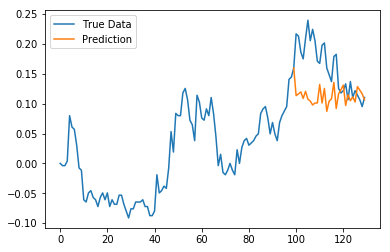

In [2]:
x_train, y_train, x_test, y_test = lstm.SplitDatatoTest(NormalizeData, ColumnList, NumOfPredictDay)
#預測
predictions = lstm.predict_point_by_point(model, x_test)
lstm.plot_predict(predictions, NumOfPredictDay, x_test, y_test)